In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Exploring dataset

In [162]:
df = pd.read_csv("data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [168]:
# List out numeric and categorical features

num_features = list(df.dtypes[(df.dtypes == "int64")|(df.dtypes == "float64")].index)
cat_features = list(df.dtypes[(df.dtypes == "object")].index)
print(f'numerical features: {num_features}')
print(f'categorical features: {cat_features}')

numerical features: ['year', 'engine_hp', 'engine_cylinders', 'number_of_doors', 'highway_mpg', 'city_mpg', 'popularity', 'msrp']
categorical features: ['make', 'model', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']


In [169]:
# Changing column names to lower case
df.columns = df.columns.str.lower().str.replace(" ", "_")


In [170]:
# Replace all space of values in string columns
for col in cat_features:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [171]:
# Describe numeric features
df[num_features].describe().T

,count,mean,std,min,25%,50%,75%,max
year,11914.0,2010.384338,7.579740,1990.0,2007.0,2015.0,2016.00,2017.0
engine_hp,11845.0,249.386070,109.191870,55.0,170.0,227.0,300.00,1001.0
engine_cylinders,11884.0,5.628829,1.780559,0.0,4.0,6.0,6.00,16.0
number_of_doors,11908.0,3.436093,0.881315,2.0,2.0,4.0,4.00,4.0
highway_mpg,11914.0,26.637485,8.863001,12.0,22.0,26.0,30.00,354.0
city_mpg,11914.0,19.733255,8.987798,7.0,16.0,18.0,22.00,137.0
popularity,11914.0,1554.911197,1441.855347,2.0,549.0,1385.0,2009.00,5657.0
msrp,11914.0,40594.737032,60109.103604,2000.0,21000.0,29995.0,42231.25,2065902.0


In [172]:
# Describe categorical features
df[cat_features].describe().T

,count,unique,top,freq
make,11914,48,chevrolet,1123
model,11914,914,silverado_1500,156
engine_fuel_type,11911,10,regular_unleaded,7172
transmission_type,11914,5,automatic,8266
driven_wheels,11914,4,front_wheel_drive,4787
market_category,8172,71,crossover,1110
vehicle_size,11914,3,compact,4764
vehicle_style,11914,16,sedan,3048


## Feature Engineering

### Identifying null values for numerical columns

In [173]:
df[num_features].isna().sum()

year                 0
engine_hp           69
engine_cylinders    30
number_of_doors      6
highway_mpg          0
city_mpg             0
popularity           0
msrp                 0
dtype: int64

<AxesSubplot:xlabel='engine_hp', ylabel='Count'>

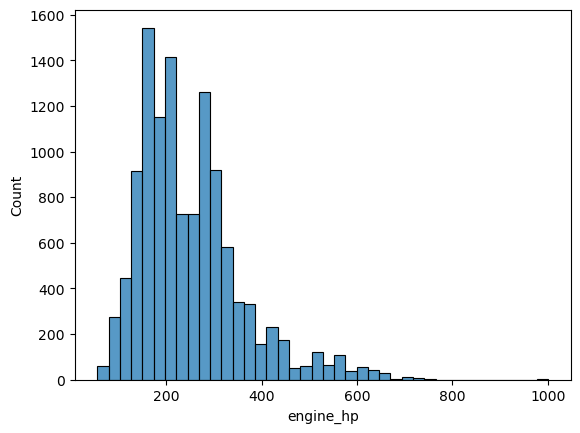

In [174]:
sns.histplot(df['engine_hp'], bins = 40)

In [175]:
df['engine_hp'].median()

227.0

In [176]:
df['engine_cylinders'].value_counts(dropna=False).sort_index()


0.0       56
3.0       30
4.0     4752
5.0      225
6.0     4489
8.0     2031
10.0      68
12.0     230
16.0       3
NaN       30
Name: engine_cylinders, dtype: int64

In [177]:
df['number_of_doors'].value_counts(dropna=False).sort_index()

2.0    3160
3.0     395
4.0    8353
NaN       6
Name: number_of_doors, dtype: int64

### Identifying null values for categorical columns

In [178]:
df[cat_features].isna().sum()

make                    0
model                   0
engine_fuel_type        3
transmission_type       0
driven_wheels           0
market_category      3742
vehicle_size            0
vehicle_style           0
dtype: int64

In [179]:
df["engine_fuel_type"].value_counts(dropna=False).sort_index()

diesel                                           154
electric                                          66
flex-fuel_(premium_unleaded_recommended/e85)      26
flex-fuel_(premium_unleaded_required/e85)         54
flex-fuel_(unleaded/e85)                         899
flex-fuel_(unleaded/natural_gas)                   6
natural_gas                                        2
premium_unleaded_(recommended)                  1523
premium_unleaded_(required)                     2009
regular_unleaded                                7172
NaN                                                3
Name: engine_fuel_type, dtype: int64

In [180]:
df["engine_fuel_type"].mode()

0    regular_unleaded
Name: engine_fuel_type, dtype: object

In [181]:
df["market_category"].value_counts(dropna=False).sort_index()

crossover                                          1110
crossover,diesel                                      7
crossover,exotic,luxury,high-performance              1
crossover,exotic,luxury,performance                   1
crossover,factory_tuner,luxury,high-performance      26
                                                   ... 
luxury,performance                                  673
luxury,performance,hybrid                            11
performance                                         601
performance,hybrid                                    1
NaN                                                3742
Name: market_category, Length: 72, dtype: int64

### Target variable

<AxesSubplot:xlabel='msrp', ylabel='Count'>

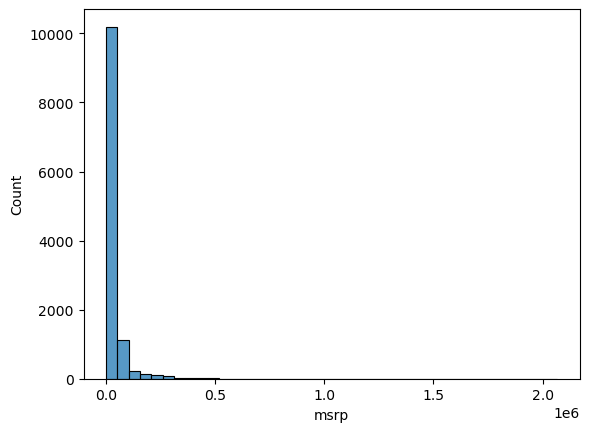

In [182]:
sns.histplot(df.msrp, bins = 40)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

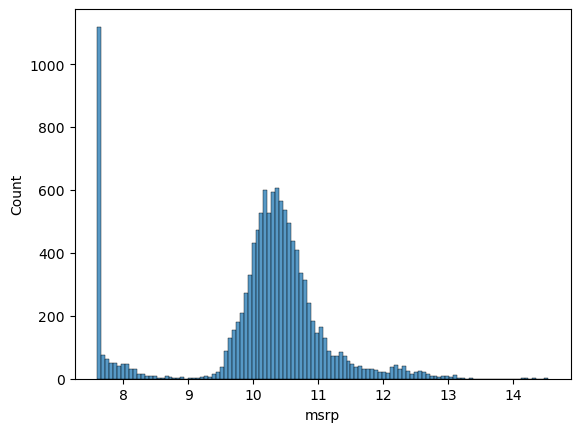

In [183]:
sns.histplot(np.log1p(df.msrp))

### Missing value imputation

In [184]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [185]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [186]:
df = df.loc[:, ['year', 'engine_fuel_type', 'engine_hp', 'engine_cylinders',
            'transmission_type', 'number_of_doors', 'highway_mpg',
            'city_mpg', 'popularity', 'msrp']]

In [187]:
df["age"] = 2017-df["year"]
df.head()

,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,number_of_doors,highway_mpg,city_mpg,popularity,msrp,age
0,2011,premium_unleaded_(required),335.0,6.0,manual,2.0,26,19,3916,46135,6
1,2011,premium_unleaded_(required),300.0,6.0,manual,2.0,28,19,3916,40650,6
2,2011,premium_unleaded_(required),300.0,6.0,manual,2.0,28,20,3916,36350,6
3,2011,premium_unleaded_(required),230.0,6.0,manual,2.0,28,18,3916,29450,6
4,2011,premium_unleaded_(required),230.0,6.0,manual,2.0,28,18,3916,34500,6


In [188]:
n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

np.random.seed(2)
idx = np.arange(n)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val:].copy()

y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [189]:
features_num_arbitary_cyl = ['engine_cylinders']
features_num_arbitary_door = ['number_of_doors']
features_num_median = ['engine_hp']
features_cat_frequent = ['engine_fuel_type']

In [190]:
imputer_num_arbitary_cyl = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant',
                                      fill_value=3))])

imputer_num_arbitary_door = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant',
                                      fill_value=4))])

imputer_num_median = Pipeline(steps=[('imputer',
                                      SimpleImputer(strategy='median')),])

imputer_cat_frequent = Pipeline(steps=[('imputer',
                                        SimpleImputer(strategy='most_frequent'))])

In [191]:
preprocessor = ColumnTransformer(transformers=[('imp_num_arbitary_cyl',
                                                imputer_num_arbitary_cyl,
                                                features_num_arbitary_cyl),
                                               
                                                ('imp_num_arbitary_door',
                                                imputer_num_arbitary_door,
                                                features_num_arbitary_door),
                                                
                                                ('imp_num_median',
                                                 imputer_num_median,
                                                 features_num_median),
                                                
                                                ('imp_cat_frequent',
                                                 imputer_cat_frequent,
                                                 features_cat_frequent)],
                                 remainder='passthrough')

In [192]:
preprocessor.fit(df_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imp_num_arbitary_cyl',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value=3,
                                                                strategy='constant'))]),
                                 ['engine_cylinders']),
                                ('imp_num_arbitary_door',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value=4,
                                                                strategy='constant'))]),
                                 ['number_of_doors']),
                                ('imp_num_median',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['engine_hp']),
                                ('imp_cat_frequent',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['engine_fuel_type'])])

In [193]:
preprocessor.get_feature_names_out()

array(['imp_num_arbitary_cyl__engine_cylinders',
       'imp_num_arbitary_door__number_of_doors',
       'imp_num_median__engine_hp', 'imp_cat_frequent__engine_fuel_type',
       'remainder__year', 'remainder__transmission_type',
       'remainder__highway_mpg', 'remainder__city_mpg',
       'remainder__popularity', 'remainder__msrp', 'remainder__age'],
      dtype=object)

In [194]:
X_train = preprocessor.transform(df_train)
X_val = preprocessor.transform(df_val)
X_test = preprocessor.transform(df_test)

In [195]:
X_train[2]

array([4.0, 4.0, 148.0, 'regular_unleaded', 2016, 'automatic', 37, 28,
       640, 19795, 1], dtype=object)

In [196]:
columns = ['engine_cylinders', 'number_of_doors', 'engine_hp', 'engine_fuel_type',
       'year', 'transmission_type', 'highway_mpg', 'city_mpg', 'popularity', 'msrp', "age"]

X_train = pd.DataFrame(X_train, columns = columns)
X_val = pd.DataFrame(X_val, columns = columns)
X_test = pd.DataFrame(X_test, columns = columns)

In [197]:
feat = ['engine_cylinders', 'number_of_doors', 'engine_hp', 'engine_fuel_type']
print(f'X_train: {X_train[feat].isna().sum()}')
print(f'X_val: {X_val[feat].isna().sum()}')
print(f'X_test: {X_test[feat].isna().sum()}')

X_train: engine_cylinders    0
number_of_doors     0
engine_hp           0
engine_fuel_type    0
dtype: int64
X_val: engine_cylinders    0
number_of_doors     0
engine_hp           0
engine_fuel_type    0
dtype: int64
X_test: engine_cylinders    0
number_of_doors     0
engine_hp           0
engine_fuel_type    0
dtype: int64


In [198]:
X_train.head(2)

,engine_cylinders,number_of_doors,engine_hp,engine_fuel_type,year,transmission_type,highway_mpg,city_mpg,popularity,msrp,age
0,4.0,2.0,148.0,regular_unleaded,2008,manual,33,24,1385,14410,9
1,4.0,4.0,132.0,regular_unleaded,2012,automatic,32,25,2031,19685,5


In [199]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7150 entries, 0 to 7149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   engine_cylinders   7150 non-null   object
 1   number_of_doors    7150 non-null   object
 2   engine_hp          7150 non-null   object
 3   engine_fuel_type   7150 non-null   object
 4   year               7150 non-null   object
 5   transmission_type  7150 non-null   object
 6   highway_mpg        7150 non-null   object
 7   city_mpg           7150 non-null   object
 8   popularity         7150 non-null   object
 9   msrp               7150 non-null   object
 10  age                7150 non-null   object
dtypes: object(11)
memory usage: 614.6+ KB


In [200]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2382 entries, 0 to 2381
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   engine_cylinders   2382 non-null   object
 1   number_of_doors    2382 non-null   object
 2   engine_hp          2382 non-null   object
 3   engine_fuel_type   2382 non-null   object
 4   year               2382 non-null   object
 5   transmission_type  2382 non-null   object
 6   highway_mpg        2382 non-null   object
 7   city_mpg           2382 non-null   object
 8   popularity         2382 non-null   object
 9   msrp               2382 non-null   object
 10  age                2382 non-null   object
dtypes: object(11)
memory usage: 204.8+ KB


In [201]:
# using dictionary to convert specific column's data type
convert_dict = {'year': 'int64',
                'engine_fuel_type': 'object',
                'engine_hp': 'float64',
                'engine_cylinders': 'float64',
                'transmission_type': 'object',
                'number_of_doors': 'object',
                'highway_mpg': 'int64',
                'city_mpg': 'int64',
                'popularity': 'int64',
                'msrp': 'int64',
                'age': 'int64'
                }
 
X_train = X_train.astype(convert_dict)
X_val = X_val.astype(convert_dict)
X_test = X_test.astype(convert_dict)
print(X_train.dtypes)

engine_cylinders     float64
number_of_doors       object
engine_hp            float64
engine_fuel_type      object
year                   int64
transmission_type     object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
age                    int64
dtype: object


### Dummy coding


In [202]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7150 entries, 0 to 7149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   engine_cylinders   7150 non-null   float64
 1   number_of_doors    7150 non-null   object 
 2   engine_hp          7150 non-null   float64
 3   engine_fuel_type   7150 non-null   object 
 4   year               7150 non-null   int64  
 5   transmission_type  7150 non-null   object 
 6   highway_mpg        7150 non-null   int64  
 7   city_mpg           7150 non-null   int64  
 8   popularity         7150 non-null   int64  
 9   msrp               7150 non-null   int64  
 10  age                7150 non-null   int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 614.6+ KB


In [203]:
from feature_engine.encoding import OneHotEncoder

In [204]:
ohe_enc = OneHotEncoder(top_categories = 4,
                        variables = ['engine_fuel_type', 'transmission_type', 'number_of_doors'],
                        drop_last=False)
ohe_enc.fit(X_train)
X_train = ohe_enc.transform(X_train)
X_val = ohe_enc.transform(X_val)
X_test = ohe_enc.transform(X_test)

In [205]:
X_train.head()

,engine_cylinders,engine_hp,year,highway_mpg,city_mpg,popularity,msrp,age,engine_fuel_type_regular_unleaded,engine_fuel_type_premium_unleaded_(required),engine_fuel_type_premium_unleaded_(recommended),engine_fuel_type_flex-fuel_(unleaded/e85),transmission_type_automatic,transmission_type_manual,transmission_type_automated_manual,transmission_type_direct_drive,number_of_doors_4.0,number_of_doors_2.0,number_of_doors_3.0
0,4.0,148.0,2008,33,24,1385,14410,9,1,0,0,0,0,1,0,0,0,1,0
1,4.0,132.0,2012,32,25,2031,19685,5,1,0,0,0,1,0,0,0,1,0,0
2,4.0,148.0,2016,37,28,640,19795,1,1,0,0,0,1,0,0,0,1,0,0
3,4.0,90.0,1991,18,16,873,2000,26,1,0,0,0,0,1,0,0,0,0,1
4,8.0,385.0,2017,21,15,5657,56260,0,0,0,0,1,1,0,0,0,1,0,0


In [206]:
X_train.columns

Index(['engine_cylinders', 'engine_hp', 'year', 'highway_mpg', 'city_mpg',
       'popularity', 'msrp', 'age', 'engine_fuel_type_regular_unleaded',
       'engine_fuel_type_premium_unleaded_(required)',
       'engine_fuel_type_premium_unleaded_(recommended)',
       'engine_fuel_type_flex-fuel_(unleaded/e85)',
       'transmission_type_automatic', 'transmission_type_manual',
       'transmission_type_automated_manual', 'transmission_type_direct_drive',
       'number_of_doors_4.0', 'number_of_doors_2.0', 'number_of_doors_3.0'],
      dtype='object')

### Model fitting

$$w = (X^TX)^{-1}X^Ty$$

In [207]:
def train_linear_regression(X, y):
    # adding the dummy column
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    # normal equation formula
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

In [208]:
X_train.drop("msrp", axis = 1, inplace = True)
X_val.drop("msrp", axis = 1, inplace = True)
X_test.drop("msrp", axis = 1, inplace = True)

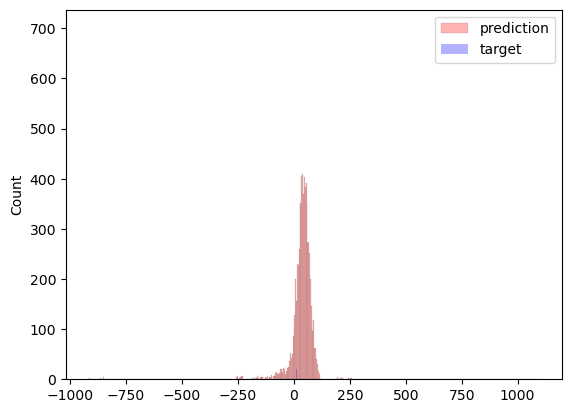

In [209]:
# Model evaluation on train dataset
w_0, w = train_linear_regression(X_train.values, y_train)
y_pred = w_0 + X_train.dot(w)

# Plotting
sns.histplot(y_pred, label='prediction', color="red", alpha = 0.3)
sns.histplot(y_train, label='target', color = "blue", alpha = 0.3)
plt.legend()

### Model evaluation using RMSE

$$RMSE = \sqrt{\sum_{n=1}^{m} \left(g(X_i) - y_i \right)^2}$$
$$g(Xi) = w_0 + X.w$$

In [210]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [211]:
y_pred = w_0 + (X_val.values).dot(w)
rmse(y_val, y_pred)

65.52256073212047

### Regulization

$$w = (X^TX + \alpha I)^{-1}X^Ty$$
$$I = Identity Matrix$$
$$\alpha = regulization\, parameter$$

In [212]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

In [213]:
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = train_linear_regression_reg(X_train.values, y_train, r=r)
    y_pred = w_0 + (X_test.values).dot(w)
    print(f'r: {r} | train rmse: {rmse(y_test, y_pred)}')

r: 0 | train rmse: 60.48511857705868
r: 0.001 | train rmse: 0.4603646919939417
r: 0.01 | train rmse: 0.46036561355897027
r: 0.1 | train rmse: 0.4603756704048682
r: 1 | train rmse: 0.46052413376184753
r: 10 | train rmse: 0.46183760685369646


Train rmse: 0.47286973118839454


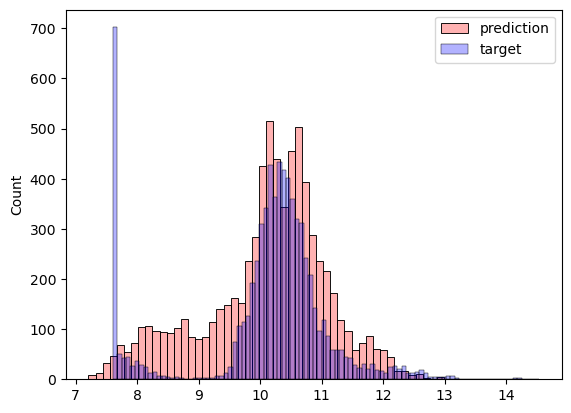

In [214]:
w_0, w = train_linear_regression_reg(X_train.values, y_train, r=0.01)
y_pred = w_0 + (X_train.values).dot(w)
print('Train rmse:', rmse(y_train, y_pred))

sns.histplot(y_pred, label='prediction', color="red", alpha = 0.3)
sns.histplot(y_train, label='target', color = "blue", alpha = 0.3)
plt.legend()

In [218]:
w_0, w = train_linear_regression_reg(X_val.values, y_val, r=0.001)
y_pred = w_0 + (X_val.values).dot(w)
print('Validation rmse:', round(rmse(y_val, y_pred),3))

w_0, w = train_linear_regression_reg(X_train.values, y_train, r=0.001)
y_pred = w_0 + (X_test.values).dot(w)
print('Test rmse:', round(rmse(y_test, y_pred),3))



Validation rmse: 0.463
Test rmse: 0.46
